## CSE246-Final Project

Social, cultural, and government intervention effects on the spread of COVID-19

### Description
This Notebook is a collaboration between Samaa and Niharika and will be used to study the effects of social, cultural and governemnt factors on the spread of COVID-19. This study will span multiple countries such as: Saudi Arabia, India, The United States. 

### resources
- Basic world wide data https://github.com/CSSEGISandData/COVID-19
- Detailed Saudi Data https://gist.github.com/AlrasheedA/e3ba0be8cbdd4e133146d2e17cd9a354
- Exploratory notebook https://github.com/alfozan/COVID-19-notebook/blob/master/COVID-19-Saudi.ipynb

### The Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# world wide data
# confirmed_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
# deaths_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

confirmed_csv = "/Users/niharika/Desktop/CSE 246 Responsible Data Science /COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_csv = "/Users/niharika/Desktop/CSE 246 Responsible Data Science /COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

df_confirmed_raw = pd.read_csv(confirmed_csv)
df_deaths_raw = pd.read_csv(deaths_csv)

In [3]:
# prepare dataframe
def clean_df(raw_df):
    col_rename = {"Province/State": "Province", "Country/Region": "Country"}
    cleaned_df = raw_df.rename(columns=col_rename)
    cleaned_df = cleaned_df.set_index(["Country", "Province"])
    cleaned_df = cleaned_df[[x for x in cleaned_df.columns if x not in ["Lat", "Long"]]]
    cleaned_df.columns = pd.to_datetime(cleaned_df.columns)
    cleaned_df.columns.name = "dt"
    return cleaned_df

df_confirmed = clean_df(df_confirmed_raw)
df_deaths = clean_df(df_deaths_raw)


In [4]:
# Saudi Arabia data
# Saudi_data = "https://gist.githubusercontent.com/AlrasheedA/e3ba0be8cbdd4e133146d2e17cd9a354/raw/c0781a95346a223436af8f4b9b790285b2697276/saudi_covid19.csv"
# df_saudi_raw = pd.read_csv(Saudi_data)

## Basic Saudi data

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.style.use("fivethirtyeight")
pd.plotting.register_matplotlib_converters()

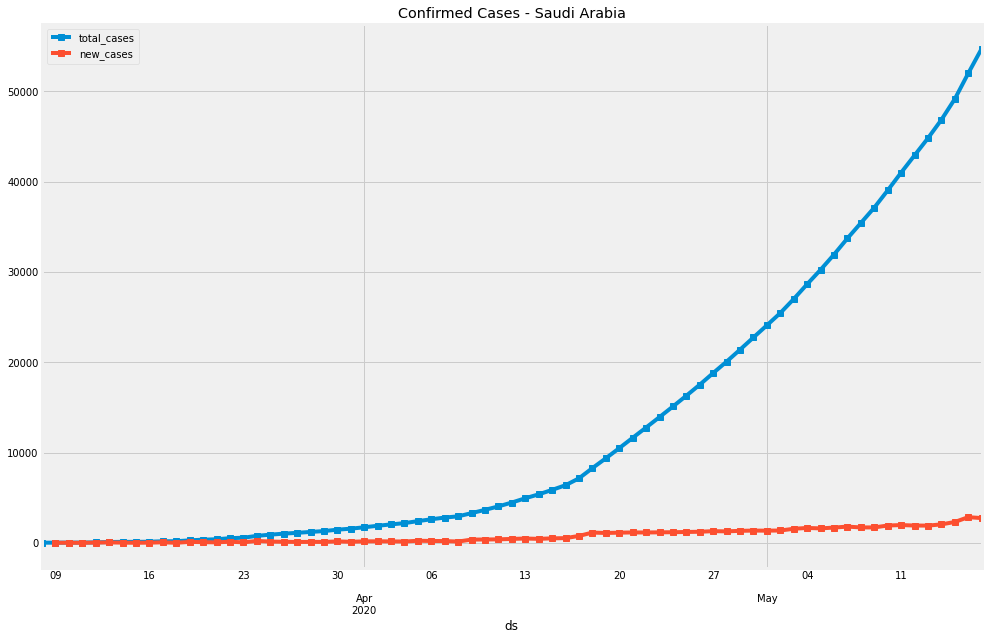

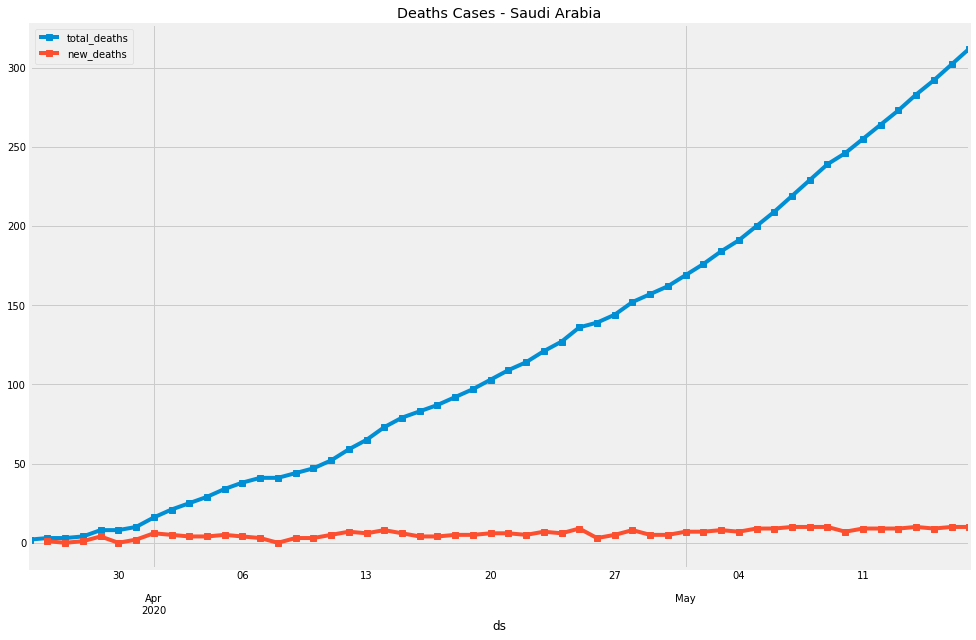

In [6]:
# load confirmed cases
df_confirmed_saudi = df_confirmed.xs(["Saudi Arabia", np.NaN])  # subset of dataset (rows = Saudi Arabia)
# renaming columns to dateTime and totalCases (a dataframe of (no of days) rows and 2 columns )  
df_confirmed_saudi = pd.DataFrame(
    {
        "ds": pd.to_datetime(df_confirmed_saudi.index),
        "total_cases": df_confirmed_saudi.values.astype("int32"),
    }
)

df_confirmed_saudi = df_confirmed_saudi[(df_confirmed_saudi["total_cases"] > 10)] # only days with total cases more than 10

# calculate daily new cases
df_confirmed_saudi["new_cases"] = df_confirmed_saudi.diff()["total_cases"]

# plot confirmed cases
df_confirmed_saudi.plot(
    title="Confirmed Cases - Saudi Arabia", x="ds", figsize=(15, 10), marker="s")

# load deaths cases
df_deaths_saudi = df_deaths.xs(["Saudi Arabia", np.NaN])
df_deaths_saudi = pd.DataFrame(
    {
        "ds": pd.to_datetime(df_deaths_saudi.index),
        "total_deaths": df_deaths_saudi.values.astype("int32"),
    }
)
df_deaths_saudi = df_deaths_saudi[(df_deaths_saudi["total_deaths"] > 1)]
# calculate daily new cases
df_deaths_saudi["new_deaths"] = df_deaths_saudi.diff()["total_deaths"]

# plot death cases
df_deaths_saudi.plot(
    title="Deaths Cases - Saudi Arabia", x="ds", figsize=(15, 10), marker="s"
)

## Basic India data


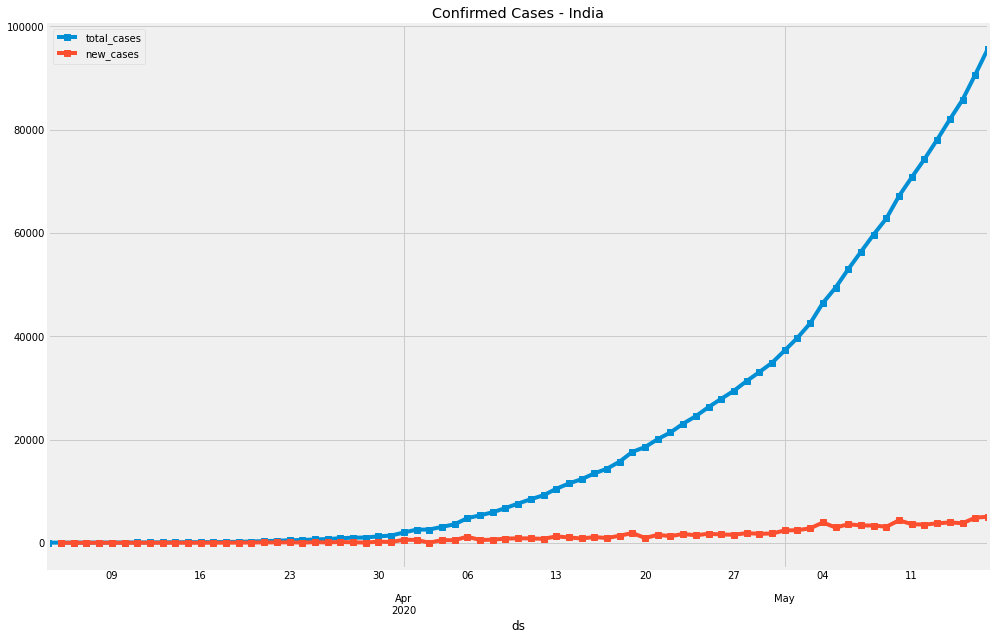

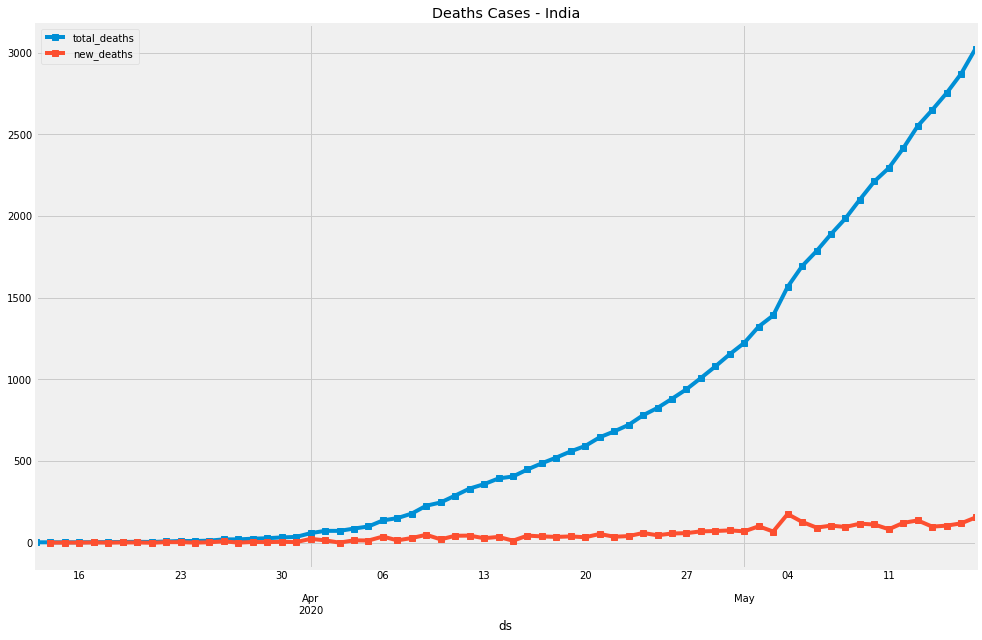

In [7]:
# load confirmed cases
df_confirmed_india = df_confirmed.xs(["India", np.NaN])
df_confirmed_india = pd.DataFrame(
    {
        "ds": pd.to_datetime(df_confirmed_india.index),
        "total_cases": df_confirmed_india.values.astype("int32"),
    }
)
df_confirmed_india = df_confirmed_india[(df_confirmed_india["total_cases"] > 10)]
# calculate daily new cases
df_confirmed_india["new_cases"] = df_confirmed_india.diff()["total_cases"]

# plot confirmed cases
df_confirmed_india.plot(
    title="Confirmed Cases - India", x="ds", figsize=(15, 10), marker="s"
)

# load deaths cases
df_deaths_india = df_deaths.xs(["India", np.NaN])
df_deaths_india = pd.DataFrame(
    {
        "ds": pd.to_datetime(df_deaths_india.index),
        "total_deaths": df_deaths_india.values.astype("int32"),
    }
)
df_deaths_india = df_deaths_india[(df_deaths_india["total_deaths"] > 1)]
# calculate daily new cases
df_deaths_india["new_deaths"] = df_deaths_india.diff()["total_deaths"]

# plot death cases
df_deaths_india.plot(
    title="Deaths Cases - India", x="ds", figsize=(15, 10), marker="s"
)

## Basic US data


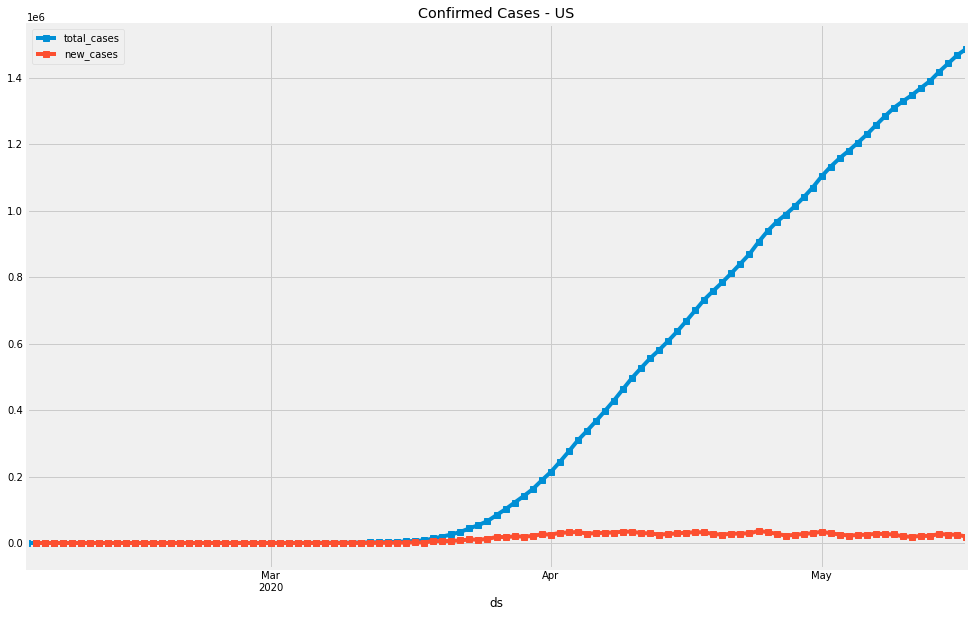

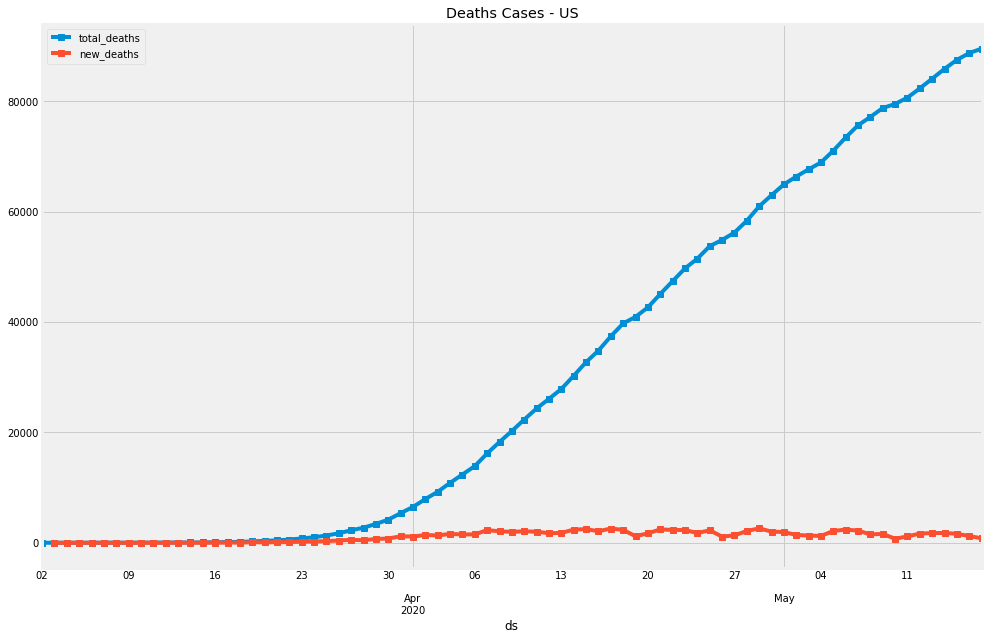

In [8]:
# load confirmed cases
df_confirmed_US = df_confirmed.xs(["US", np.NaN])
df_confirmed_US = pd.DataFrame(
    {
        "ds": pd.to_datetime(df_confirmed_US.index),
        "total_cases": df_confirmed_US.values.astype("int32"),
    }
)
df_confirmed_US = df_confirmed_US[(df_confirmed_US["total_cases"] > 10)]
# calculate daily new cases
df_confirmed_US["new_cases"] = df_confirmed_US.diff()["total_cases"]

# plot confirmed cases
df_confirmed_US.plot(
    title="Confirmed Cases - US", x="ds", figsize=(15, 10), marker="s"
)

# load deaths cases
df_deaths_US = df_deaths.xs(["US", np.NaN])
df_deaths_US = pd.DataFrame(
    {
        "ds": pd.to_datetime(df_deaths_US.index),
        "total_deaths": df_deaths_US.values.astype("int32"),
    }
)
df_deaths_US = df_deaths_US[(df_deaths_US["total_deaths"] > 1)]
# calculate daily new cases
df_deaths_US["new_deaths"] = df_deaths_US.diff()["total_deaths"]

# plot death cases
df_deaths_US.plot(
    title="Deaths Cases - US", x="ds", figsize=(15, 10), marker="s"
)

## Basic Germany data


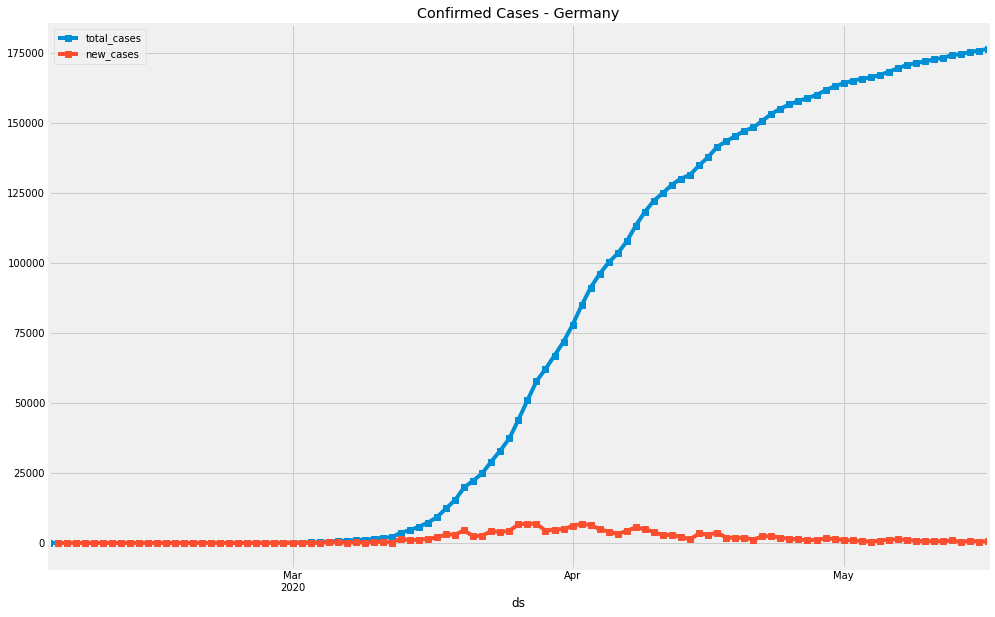

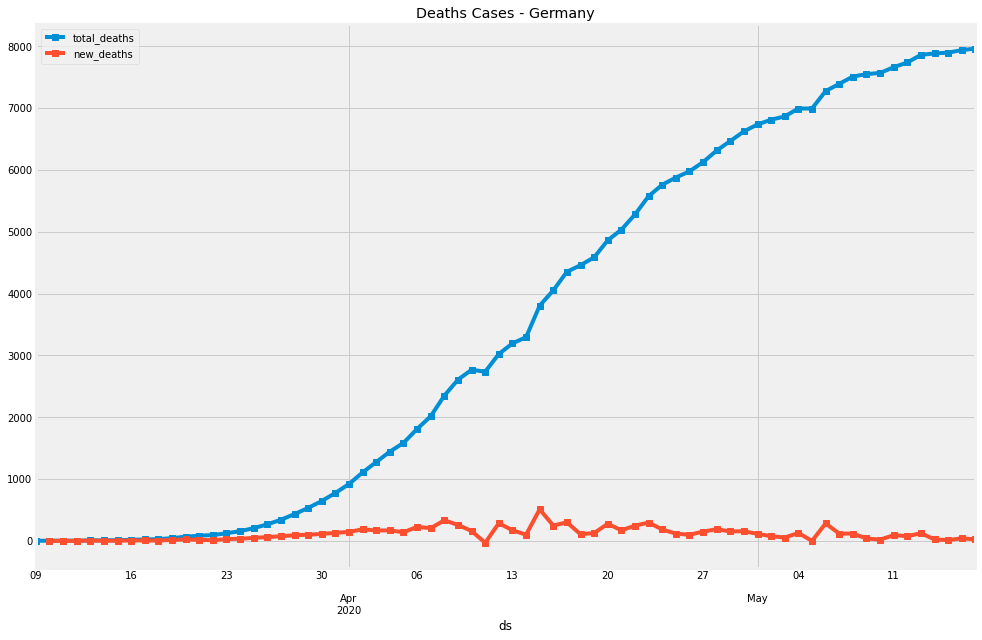

In [9]:
    # load confirmed cases
df_confirmed_Germany = df_confirmed.xs(["Germany", np.NaN])
df_confirmed_Germany = pd.DataFrame(
    {
        "ds": pd.to_datetime(df_confirmed_Germany.index),
        "total_cases": df_confirmed_Germany.values.astype("int32"),
    }
)
df_confirmed_Germany = df_confirmed_Germany[(df_confirmed_Germany["total_cases"] > 10)]
# calculate daily new cases
df_confirmed_Germany["new_cases"] = df_confirmed_Germany.diff()["total_cases"]

# plot confirmed cases
df_confirmed_Germany.plot(
    title="Confirmed Cases - Germany", x="ds", figsize=(15, 10), marker="s"
)

# load deaths cases
df_deaths_Germany = df_deaths.xs(["Germany", np.NaN])
df_deaths_Germany = pd.DataFrame(
    {
        "ds": pd.to_datetime(df_deaths_Germany.index),
        "total_deaths": df_deaths_Germany.values.astype("int32"),
    }
)
df_deaths_Germany = df_deaths_Germany[(df_deaths_Germany["total_deaths"] > 1)]
# calculate daily new cases
df_deaths_Germany["new_deaths"] = df_deaths_Germany.diff()["total_deaths"]

# plot death cases
df_deaths_Germany.plot(
    title="Deaths Cases - Germany", x="ds", figsize=(15, 10), marker="s"
)


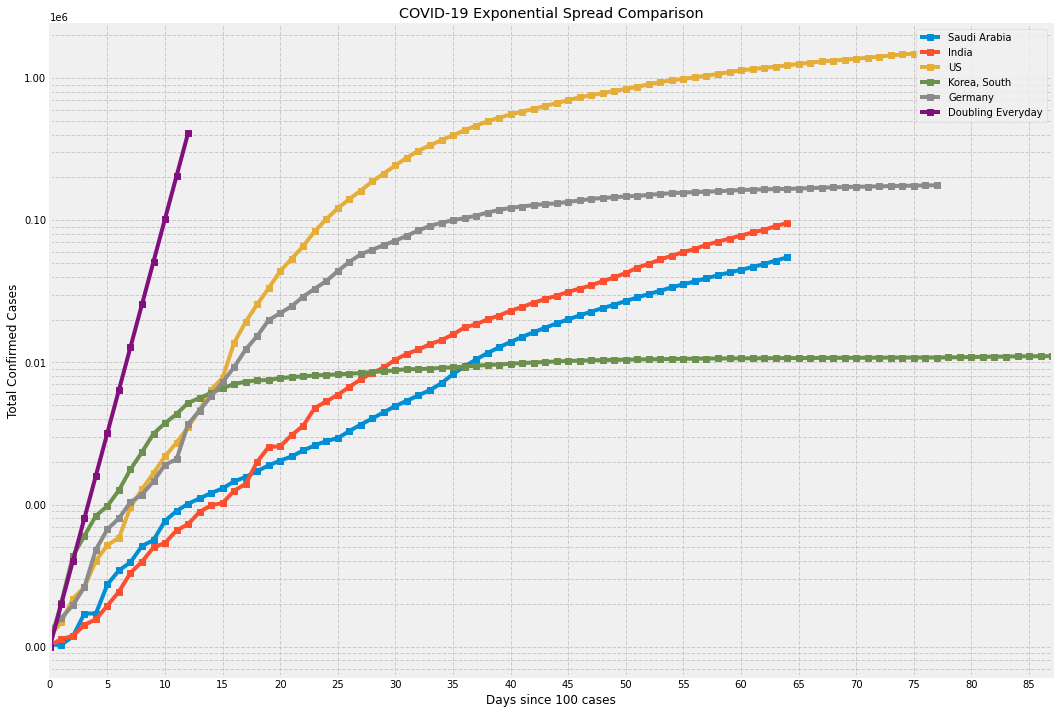

In [10]:
# comparison countries list
countries = ["Saudi Arabia", "India", "US", "Korea, South", "Germany"]
lower_cases_cutoff = 100

countries_data = [
    df_confirmed.xs([country, np.NaN]).values.astype("int32") for country in countries
]

countries_data = [
    country[(country > lower_cases_cutoff)].tolist() for country in countries_data
]

# doubling every day trend
trend_double_every_day = [lower_cases_cutoff * 2 ** i for i in range(13)]
countries_data.append(trend_double_every_day)
countries.append("Doubling Everyday")

# pad
max_len = max([len(c) for c in countries_data])
countries_data = [
    country + [np.NaN] * (max_len - len(country)) for country in countries_data
]

total_cases_comparison = pd.DataFrame(
    np.stack(countries_data).T, index=range(max_len), columns=countries,
)

# plot
ax = total_cases_comparison.plot(
    title="COVID-19 Exponential Spread Comparison", figsize=(16, 12), marker="s"
)

# set chart options
plt.xlabel("Days since 100 cases")
plt.ylabel("Total Confirmed Cases")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--")
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())



# SEIR Epidemic Model


source: https://www.idmod.org/

References:

- https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model
- Interactive Demo: http://gabgoh.github.io/COVID/index.html
- http://www.idmod.org/docs/hiv/model-sir.html
- https://www.youtube.com/watch?v=gxAaO2rsdIs
- https://www.youtube.com/watch?v=vL6NfB7BKeY

In [11]:
# basic SEIR model implementation using Euler's forward method
def SEIR_model(initial_conditions, model_parameters, days):
    # Susceptible, Exposed, Infected, Recovered
    S_0, E_0, I_0, R_0 = initial_conditions
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]

    sigma, beta, gamma = model_parameters
    for i in range(days):
        _beta = beta(i)

        next_S = S[-1] - (_beta * S[-1] * I[-1])
        next_E = E[-1] + (_beta * S[-1] * I[-1] - sigma * E[-1])
        next_I = I[-1] + (sigma * E[-1] - gamma * I[-1])
        next_R = R[-1] + (gamma * I[-1])
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)

    return pd.DataFrame(
        np.stack([S, E, I, R]).T ,
        columns=["Susceptible","Exposed", "Infected", "Recovered"], )

In [12]:
# Helper function to plot simulation results
from matplotlib.ticker import FuncFormatter


def SEIR_chart(df, suptitle="", title=""):
    linecolors = ["#FC4F30", "#34656B", "#434344"]
    ax = df.plot.area(figsize=(16, 10), color=linecolors)

    legend_labels = df.columns.to_list()
    plt.suptitle(suptitle, size=20)
    plt.title(title, size=12)
    plt.legend(legend_labels, loc="center right", fontsize=20)

    formatter = FuncFormatter(lambda x, pos: "%1.0fM" % (x * 1e-6))
    ax.yaxis.set_major_formatter(formatter)
    plt.rcParams.update({"font.size": 16})

def SEIR_chart_extra_annotations(intervention_day, y):
    # plt.text adds text to these axes 
    plt.text(0.74, 0.05, "Healthcare Capacity", transform=ax.transAxes, bbox=dict(facecolor="white", alpha=0.5), fontsize=20)
    plt.axhline(y, color="b", linestyle="--", linewidth=2)

    plt.text(0.12, 0.7, "Intervention Day", transform=ax.transAxes, bbox=dict(facecolor="white", alpha=0.5), fontsize=20, rotation=0)
    plt.axvline(x=intervention_day, color="black", linestyle="--", linewidth=2)

## SEIR Simulation for disease spread without any interventions (Saudi Arabia)
deaths and severe cases are not modeled for simplicity
Parameters sources:

- https://en.wikipedia.org/wiki/Coronavirus_disease_2019
- https://twitter.com/SaudiCDC/status/1243521250141577217?s=20

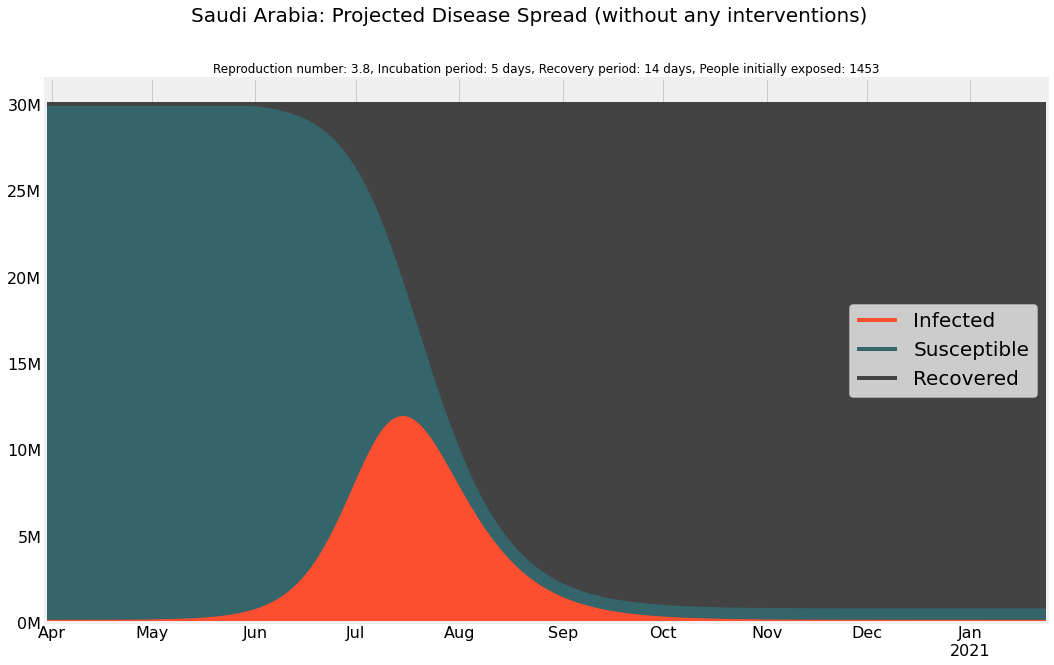

In [15]:
# Model parameters
incubation_period = 5 # Days from infection to transmission / latent period until becoming infectious.
recovery_period = 14 # Days from infection to recovery (until no longer being infectious).
reproduction_number = 3.8 # Number of susceptible people who get exposed/infected by an infected individual.

# Model rates calculations
sigma = 1 / incubation_period
gamma = 1 / recovery_period
#beta = reproduction_number * gamma
beta = lambda _: reproduction_number * gamma

# Simulation parameters
simulation_duration = 10 * 30  # in days
population_size = 30e6

# Initial_conditions
start_date = pd.to_datetime("2020-03-30")  
initial_exposed = 1453  # 10k active cases
initial_infected = 0
initial_recovered = 0
init_vals = (
    1 - initial_exposed / population_size,
    initial_exposed / population_size,
    initial_infected,
    initial_recovered,
)

# Run simulation
results_df = SEIR_model(
    initial_conditions=init_vals,
    model_parameters=(sigma, beta, gamma),
    days=simulation_duration,
)
# Scale outputs by population size
results_df *= population_size
results_df = results_df.astype(int)
# Set date index
results_df.index = pd.date_range(
    start_date, start_date + pd.Timedelta(days=simulation_duration)
)

# Plotting
# for plotting purposes, "infected" includes individuals who have been exposed as well
SEIR_chart(
    pd.DataFrame(
        {
            "Infected": results_df["Infected"] + results_df["Exposed"],
            "Susceptible": results_df["Susceptible"],
            "Recovered": results_df["Recovered"],
        }
    ),
    "Saudi Arabia: Projected Disease Spread (without any interventions)",
    "Reproduction number: {}, Incubation period: {} days, Recovery period: {} days, People initially exposed: {}".format(
        reproduction_number, incubation_period, recovery_period, initial_exposed
    ),
)

## SEIR Simulation for disease spread with social distancing (Saudi Arabia)

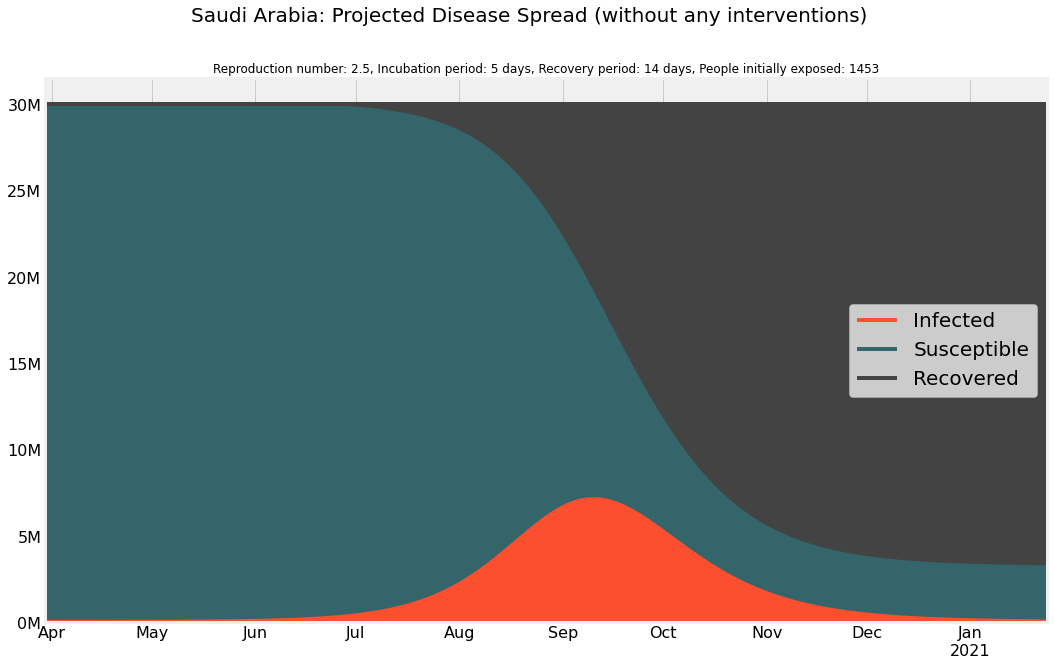

In [16]:
# Model parameters
incubation_period = 5 # Days from infection to transmission / latent period until becoming infectious.
recovery_period = 14 # Days from infection to recovery (until no longer being infectious).
reproduction_number = 2.5 # Number of susceptible people who get exposed/infected by an infected individual.

# Model rates calculations
sigma = 1 / incubation_period
gamma = 1 / recovery_period
# beta = reproduction_number * gamma
beta = lambda _: reproduction_number * gamma

# Simulation parameters
simulation_duration = 10 * 30  # in days
population_size = 30e6

# Initial_conditions
start_date = pd.to_datetime("2020-03-30")
initial_exposed = 1453 # 1k active cases
initial_infected = 0
initial_recovered = 0
init_vals = (
    1 - initial_exposed / population_size,
    initial_exposed / population_size,
    initial_infected,
    initial_recovered,
)

# Run simulation
results_df = SEIR_model(
    initial_conditions=init_vals,
    model_parameters=(sigma, beta, gamma),
    days=simulation_duration,
)
# Scale outputs by population size
results_df *= population_size
results_df = results_df.astype(int)
# Set date index
results_df.index = pd.date_range(
    start_date, start_date + pd.Timedelta(days=simulation_duration)
)

# Plotting
# for plotting purposes, "infected" includes individuals who have been exposed as well
SEIR_chart(
    pd.DataFrame(
        {
            "Infected": results_df["Infected"] + results_df["Exposed"],
            "Susceptible": results_df["Susceptible"],
            "Recovered": results_df["Recovered"],
        }
    ),
    "Saudi Arabia: Projected Disease Spread (without any interventions)",
    "Reproduction number: {}, Incubation period: {} days, Recovery period: {} days, People initially exposed: {}".format(
        reproduction_number, incubation_period, recovery_period, initial_exposed
    ),
)

## SEIR Simulation for disease spread with social distancing and early government intervention

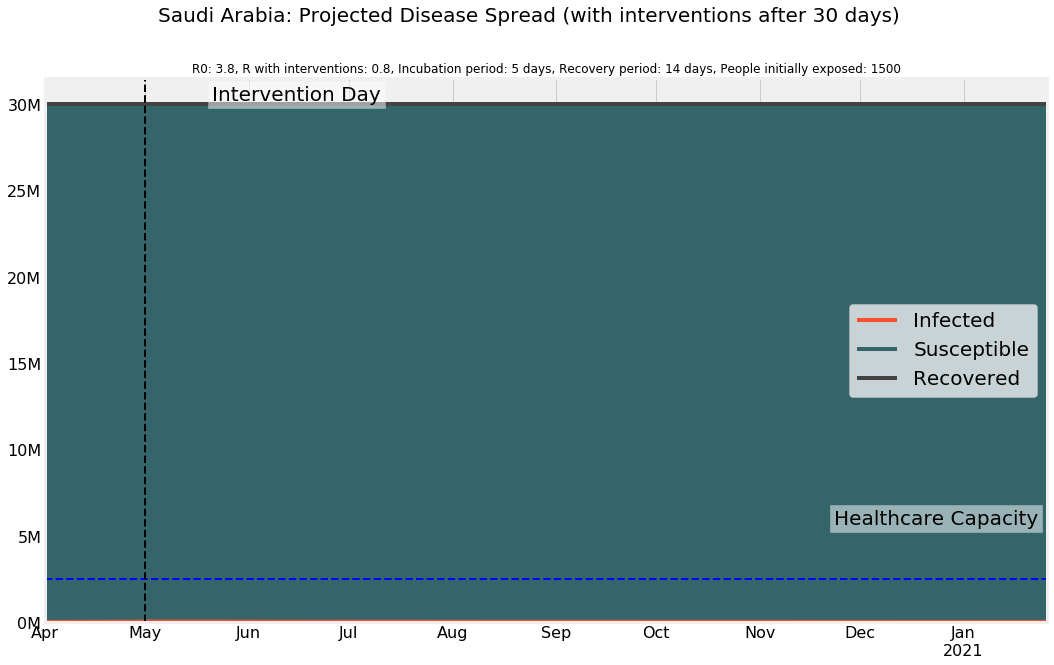

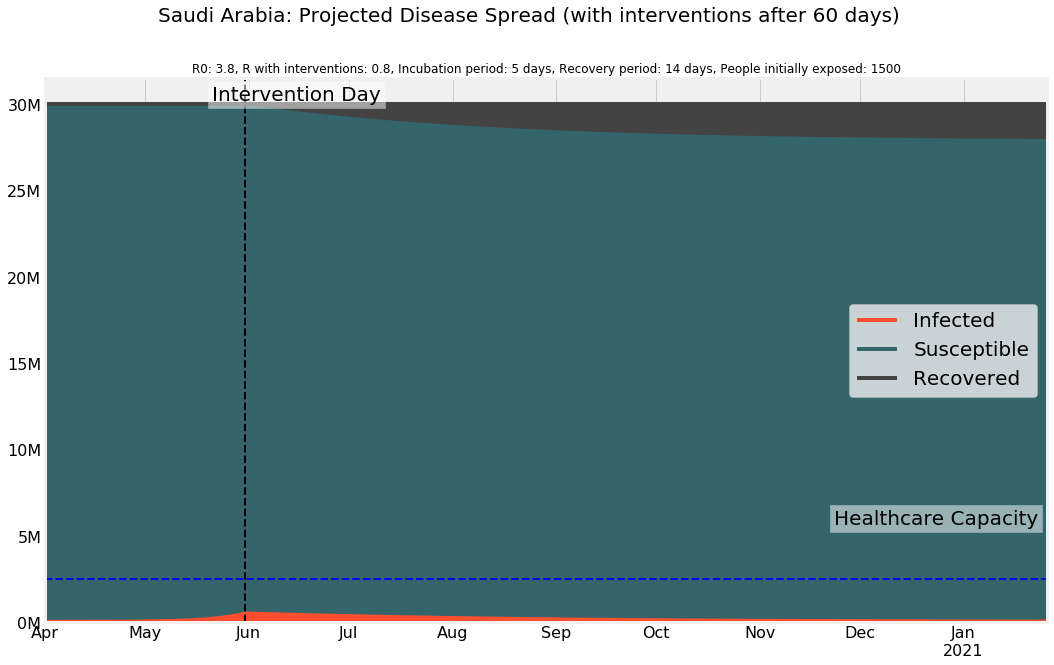

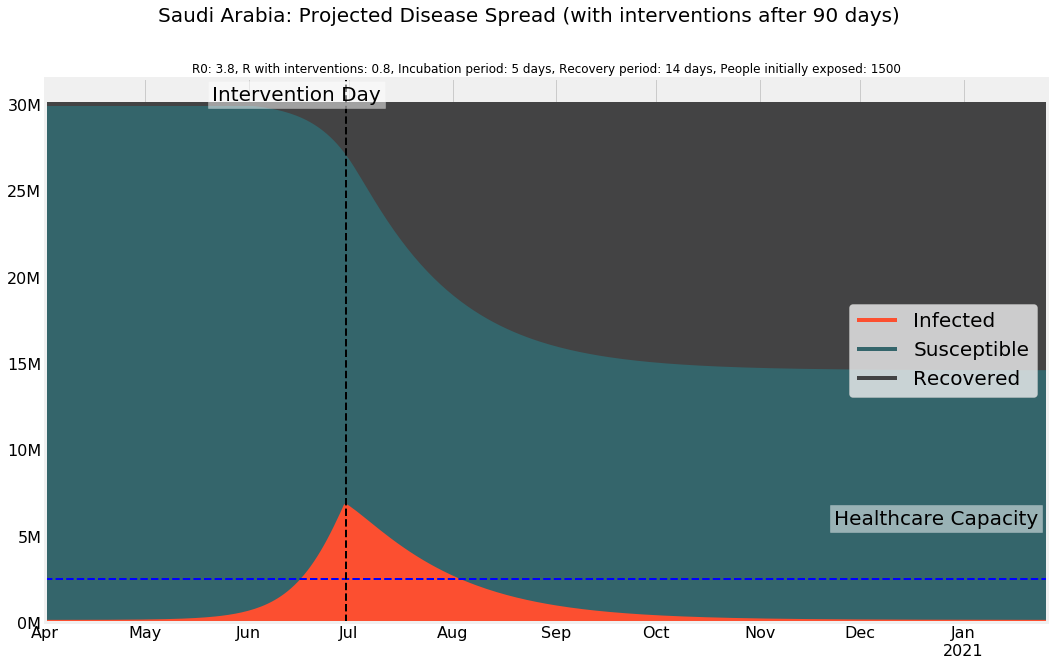

In [35]:
# Model parameters
reproduction_number_without_interventions = 3.8  # Number of susceptible people who get exposed/infected by an infected individual.
reproduction_number_with_interventions = 0.80  # Number of susceptible people who get exposed/infected by an infected individual.

intervention_days = [30, 60, 90]
for intervention_day in intervention_days:
    # Model rates calculations
    beta = (
        lambda i: (reproduction_number_without_interventions * gamma)
        if i < intervention_day
        else (reproduction_number_with_interventions * gamma)
    )

    # Run simulation
    results_df = SEIR_model(
        initial_conditions=init_vals,
        model_parameters=(sigma, beta, gamma),
        days=simulation_duration,
    )
    # Scale outputs by population size
    results_df *= population_size
    results_df = results_df.astype(int)
    # Set date index
    results_df.index = pd.date_range(
        start_date, start_date + pd.Timedelta(days=simulation_duration)
    )

    # Plotting
    # for plotting purposes, "infected" includes individuals who have been exposed as well
    SEIR_chart(
        pd.DataFrame(
            {
                "Infected": results_df["Infected"] + results_df["Exposed"],
                "Susceptible": results_df["Susceptible"],
                "Recovered": results_df["Recovered"],
            }
        ),
        "Saudi Arabia: Projected Disease Spread (with interventions after {} days)".format(
            intervention_day
        ),
        "R0: {}, R with interventions: {}, Incubation period: {} days, Recovery period: {} days, People initially exposed: {}".format(
            reproduction_number_without_interventions,
            reproduction_number_with_interventions,
            incubation_period,
            recovery_period,
            initial_exposed,
        ),
    )
    SEIR_chart_extra_annotations(
        pd.to_datetime(start_date + pd.Timedelta(days=intervention_day)), 2500000 )

## SEIR Simulation for disease spread without any interventions (INDIA)
deaths and severe cases are not modeled for simplicity
Parameters sources:
    
    - https://en.wikipedia.org/wiki/Coronavirus_disease_2019
    - https://www.worldometers.info/coronavirus/country/india/ 

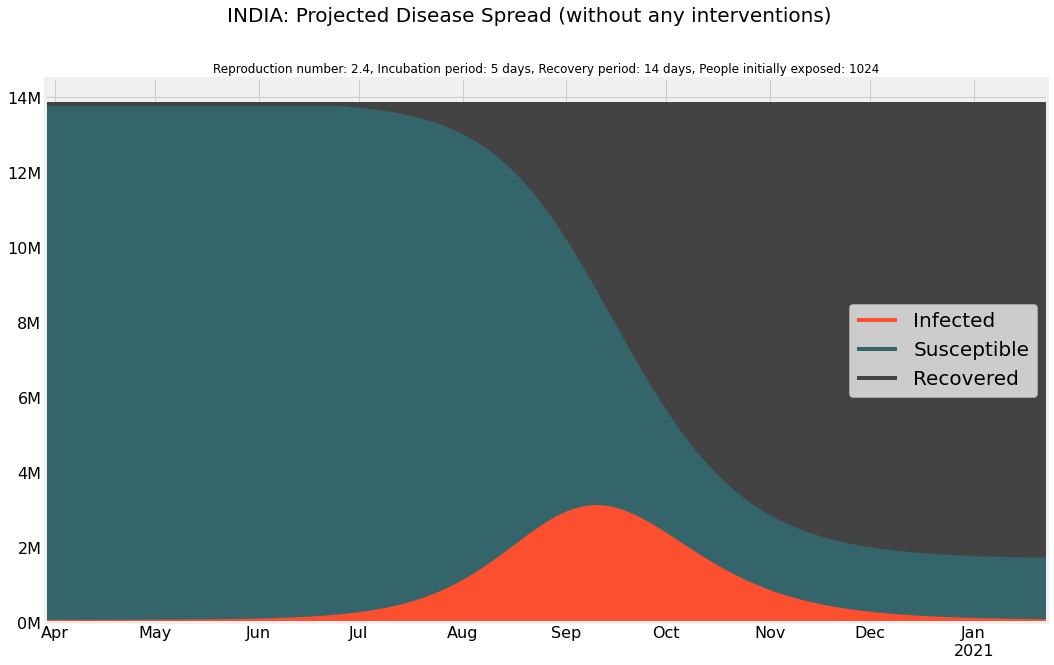

In [26]:
# Model parameters
incubation_period = 5 # Days from infection to transmission / latent period until becoming infectious.
recovery_period = 14 # Days from infection to recovery (until no longer being infectious).
reproduction_number = 2.4 # Number of susceptible people who get exposed/infected by an infected individual.

# Model rates calculations
sigma = 1 / incubation_period
gamma = 1 / recovery_period
#beta = reproduction_number * gamma
beta = lambda _: reproduction_number * gamma

# Simulation parameters
simulation_duration = 10 * 30  # 15 months in days
population_size = 1380e4 # 1380e6

# Initial_conditions
start_date = pd.to_datetime("2020-03-29") # When total cases crossed 1000
initial_exposed = 1024
initial_infected = 0
initial_recovered = 0
init_vals = (
    1 - initial_exposed / population_size,
    initial_exposed / population_size,
    initial_infected,
    initial_recovered,
)

# Run simulation
results_df = SEIR_model(
    initial_conditions=init_vals,
    model_parameters=(sigma, beta, gamma),
    days=simulation_duration,
)
# Scale outputs by population size
results_df *= population_size
results_df = results_df.astype(int)
# Set date index
results_df.index = pd.date_range(
    start_date, start_date + pd.Timedelta(days=simulation_duration)
)

# Plotting
# for plotting purposes, "infected" includes individuals who have been exposed as well
SEIR_chart(
    pd.DataFrame(
        {
            "Infected": results_df["Infected"] + results_df["Exposed"],
            "Susceptible": results_df["Susceptible"],
            "Recovered": results_df["Recovered"],
        }
    ),
    "INDIA: Projected Disease Spread (without any interventions)",
    "Reproduction number: {}, Incubation period: {} days, Recovery period: {} days, People initially exposed: {}".format(
        reproduction_number, incubation_period, recovery_period, initial_exposed
    ),
)


## SEIR Simulation for disease spread with social distancing

- https://www.medrxiv.org/content/10.1101/2020.04.09.20059261v1.full.pdf
- Reproduction No Ref: https://timesofindia.indiatimes.com/india/coronabytes/msid-75708815,card-75710140.cms
- https://www.medrxiv.org/content/10.1101/2020.04.02.20051466v1.full.pdf

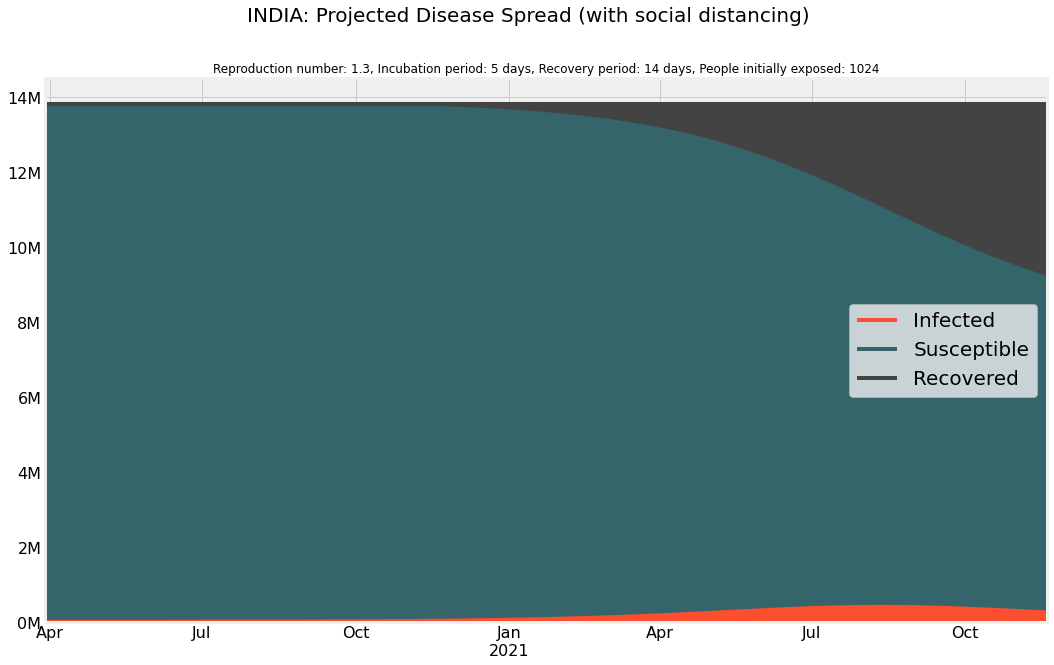

In [28]:
# Model parameters
incubation_period = 5 # Days from infection to transmission / latent period until becoming infectious.
recovery_period = 14 # Days from infection to recovery (until no longer being infectious).
reproduction_number = 1.3 # Number of susceptible people who get exposed/infected by an infected individual.

# Model rates calculations
sigma = 1 / incubation_period
gamma = 1 / recovery_period
#beta = reproduction_number * gamma
beta = lambda _: reproduction_number * gamma

# Simulation parameters
simulation_duration = 20 * 30  # 25 months in days
population_size = 1380e4       #1380e6

# Initial_conditions
start_date = pd.to_datetime("2020-03-29") # When total cases crossed 1998 
initial_exposed = 1024 
initial_infected = 0
initial_recovered = 0
init_vals = (
    1 - initial_exposed / population_size,
    initial_exposed / population_size,
    initial_infected,
    initial_recovered,
)

# Run simulation
results_df = SEIR_model(
    initial_conditions=init_vals,
    model_parameters=(sigma, beta, gamma),
    days=simulation_duration,
)
# Scale outputs by population size
results_df *= population_size
results_df = results_df.astype(int)
# Set date index
results_df.index = pd.date_range(
    start_date, start_date + pd.Timedelta(days=simulation_duration)
)

# Plotting
# for plotting purposes, "infected" includes individuals who have been exposed as well
SEIR_chart(
    pd.DataFrame(
        {
            "Infected": results_df["Infected"] + results_df["Exposed"],
            "Susceptible": results_df["Susceptible"],
            "Recovered": results_df["Recovered"],
        }
    ),
    "INDIA: Projected Disease Spread (with social distancing)",
    "Reproduction number: {}, Incubation period: {} days, Recovery period: {} days, People initially exposed: {}".format(
        reproduction_number, incubation_period, recovery_period, initial_exposed
    ),
)

## SEIR Simulation for disease spread with social distancing and early government intervention (INDIA)

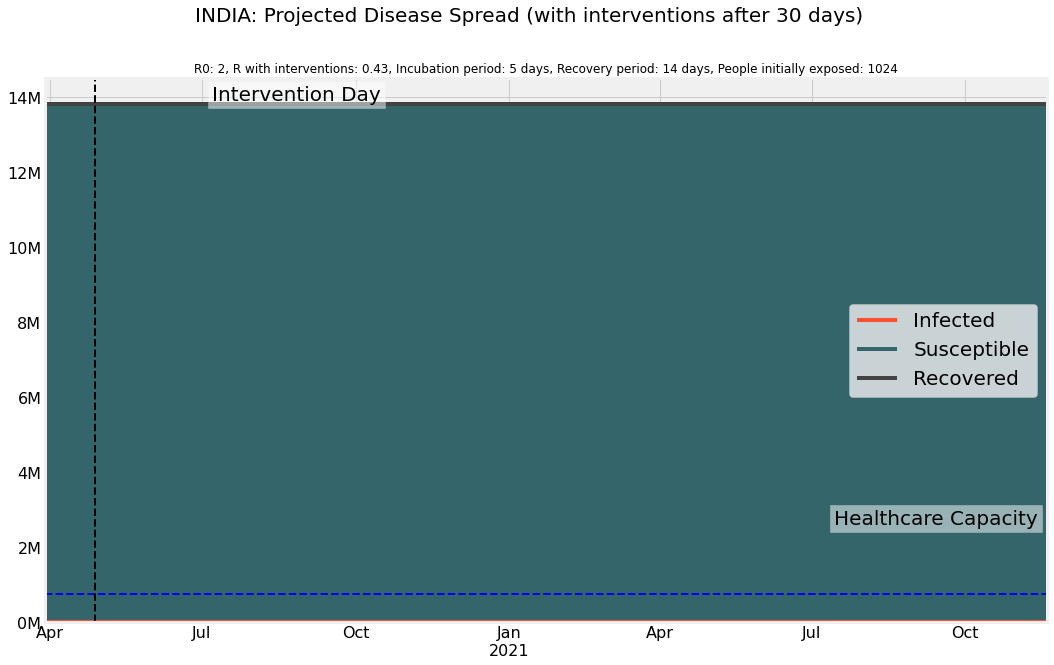

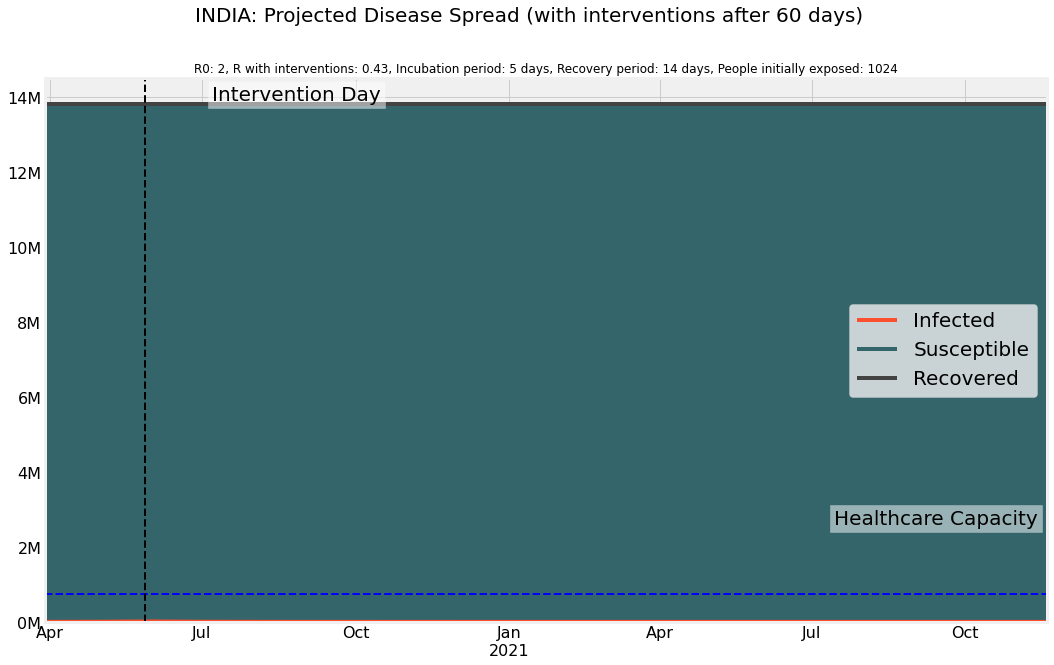

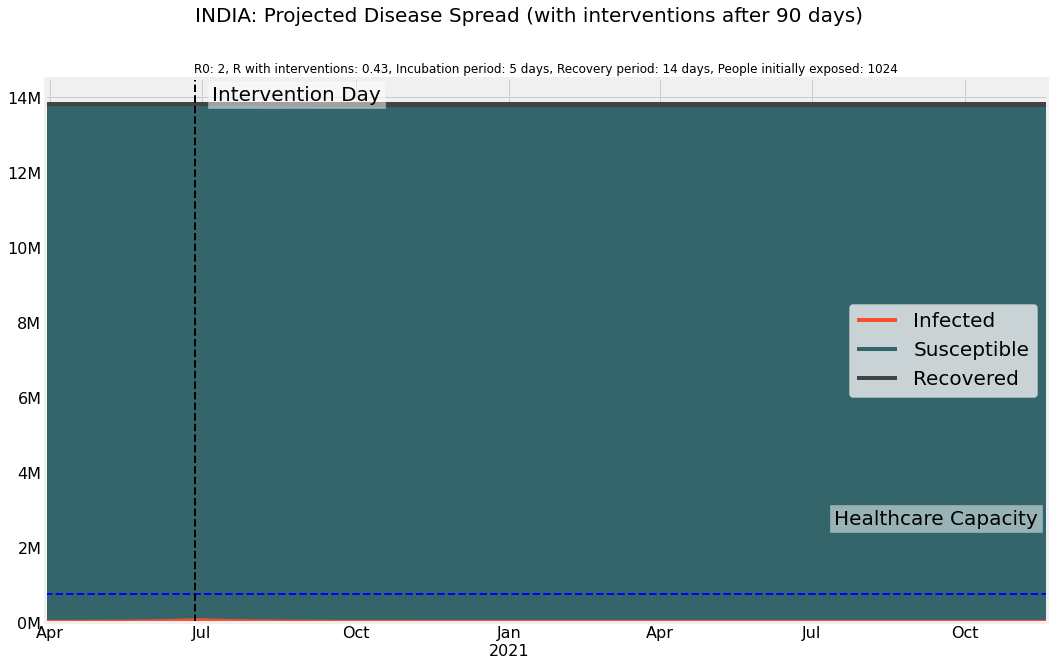

In [29]:
# Model parameters
reproduction_number_without_interventions = 2  # Number of susceptible people who get exposed/infected by an infected individual.
reproduction_number_with_interventions = 0.43  # Number of susceptible people who get exposed/infected by an infected individual.

intervention_days = [30, 60, 90]
for intervention_day in intervention_days:
    # Model rates calculations
    beta = (
        lambda i: (reproduction_number_without_interventions * gamma)
        if i < intervention_day
        else (reproduction_number_with_interventions * gamma)
    )

    # Run simulation
    results_df = SEIR_model(
        initial_conditions=init_vals,
        model_parameters=(sigma, beta, gamma),
        days=simulation_duration,
    )
    # Scale outputs by population size
    results_df *= population_size
    results_df = results_df.astype(int)
    # Set date index
    results_df.index = pd.date_range(
        start_date, start_date + pd.Timedelta(days=simulation_duration)
    )

    # Plotting
    # for plotting purposes, "infected" includes individuals who have been exposed as well
    SEIR_chart(
        pd.DataFrame(
            {
                "Infected": results_df["Infected"] + results_df["Exposed"],
                "Susceptible": results_df["Susceptible"],
                "Recovered": results_df["Recovered"],
            }
        ),
        "INDIA: Projected Disease Spread (with interventions after {} days)".format(
            intervention_day
        ),
        "R0: {}, R with interventions: {}, Incubation period: {} days, Recovery period: {} days, People initially exposed: {}".format(
            reproduction_number_without_interventions,
            reproduction_number_with_interventions,
            incubation_period,
            recovery_period,
            initial_exposed,
        ),
    )
    SEIR_chart_extra_annotations(
        pd.to_datetime(start_date + pd.Timedelta(days=intervention_day)) , 745203 )


## SEIR Simulation for disease spread without any interventions (US)

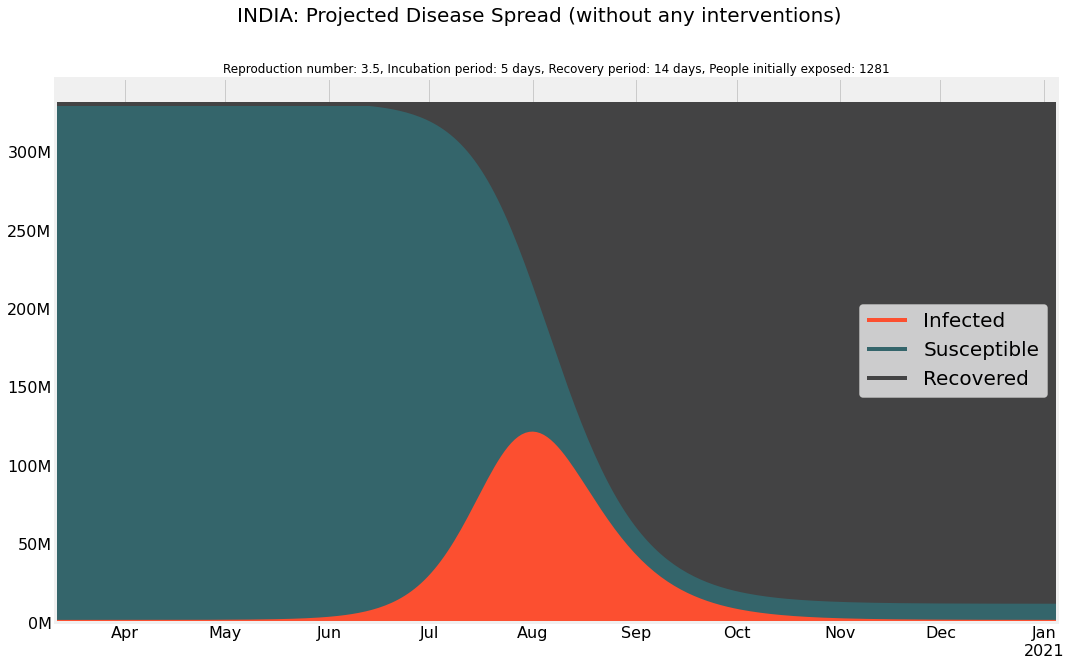

In [30]:
# Model parameters
incubation_period = 5 # Days from infection to transmission / latent period until becoming infectious.
recovery_period = 14 # Days from infection to recovery (until no longer being infectious).
reproduction_number = 3.5 # Number of susceptible people who get exposed/infected by an infected individual.

# Model rates calculations
sigma = 1 / incubation_period
gamma = 1 / recovery_period
#beta = reproduction_number * gamma
beta = lambda _: reproduction_number * gamma

# Simulation parameters
simulation_duration = 10 * 30  # 15 months in days
population_size = 330e6 # 1380e6

# Initial_conditions
start_date = pd.to_datetime("2020-03-11") # When total cases crossed 1000
initial_exposed = 1281
initial_infected = 0
initial_recovered = 0
init_vals = (
    1 - initial_exposed / population_size,
    initial_exposed / population_size,
    initial_infected,
    initial_recovered,
)

# Run simulation
results_df = SEIR_model(
    initial_conditions=init_vals,
    model_parameters=(sigma, beta, gamma),
    days=simulation_duration,
)
# Scale outputs by population size
results_df *= population_size
results_df = results_df.astype(int)
# Set date index
results_df.index = pd.date_range(
    start_date, start_date + pd.Timedelta(days=simulation_duration)
)

# Plotting
# for plotting purposes, "infected" includes individuals who have been exposed as well
SEIR_chart(
    pd.DataFrame(
        {
            "Infected": results_df["Infected"] + results_df["Exposed"],
            "Susceptible": results_df["Susceptible"],
            "Recovered": results_df["Recovered"],
        }
    ),
    "INDIA: Projected Disease Spread (without any interventions)",
    "Reproduction number: {}, Incubation period: {} days, Recovery period: {} days, People initially exposed: {}".format(
        reproduction_number, incubation_period, recovery_period, initial_exposed
    ),
)



## SEIR Simulation for disease spread with social distancing (US)

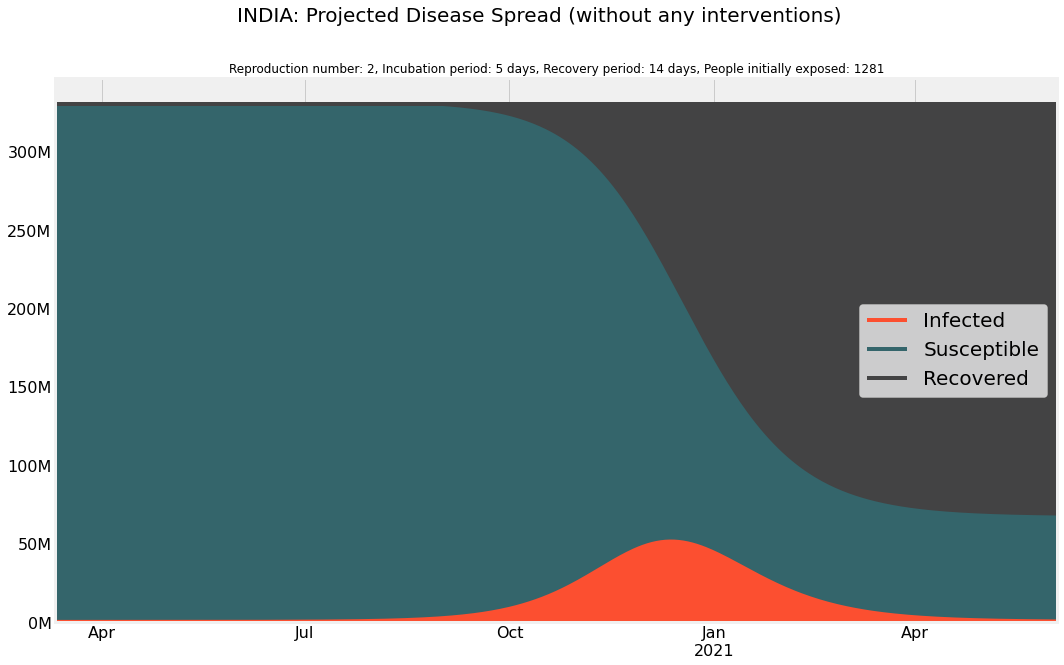

In [33]:
# Model parameters
incubation_period = 5 # Days from infection to transmission / latent period until becoming infectious.
recovery_period = 14 # Days from infection to recovery (until no longer being infectious).
reproduction_number = 2 # Number of susceptible people who get exposed/infected by an infected individual.

# Model rates calculations
sigma = 1 / incubation_period
gamma = 1 / recovery_period
#beta = reproduction_number * gamma
beta = lambda _: reproduction_number * gamma

# Simulation parameters
simulation_duration = 15 * 30  # 15 months in days
population_size = 330e6 # 1380e6

# Initial_conditions
start_date = pd.to_datetime("2020-03-11") # When total cases crossed 1000
initial_exposed = 1281
initial_infected = 0
initial_recovered = 0
init_vals = (
    1 - initial_exposed / population_size,
    initial_exposed / population_size,
    initial_infected,
    initial_recovered,
)

# Run simulation
results_df = SEIR_model(
    initial_conditions=init_vals,
    model_parameters=(sigma, beta, gamma),
    days=simulation_duration,
)
# Scale outputs by population size
results_df *= population_size
results_df = results_df.astype(int)
# Set date index
results_df.index = pd.date_range(
    start_date, start_date + pd.Timedelta(days=simulation_duration)
)

# Plotting
# for plotting purposes, "infected" includes individuals who have been exposed as well
SEIR_chart(
    pd.DataFrame(
        {
            "Infected": results_df["Infected"] + results_df["Exposed"],
            "Susceptible": results_df["Susceptible"],
            "Recovered": results_df["Recovered"],
        }
    ),
    "INDIA: Projected Disease Spread (without any interventions)",
    "Reproduction number: {}, Incubation period: {} days, Recovery period: {} days, People initially exposed: {}".format(
        reproduction_number, incubation_period, recovery_period, initial_exposed
    ),
)


## SEIR Simulation for disease spread with social distancing and early government intervention (US)


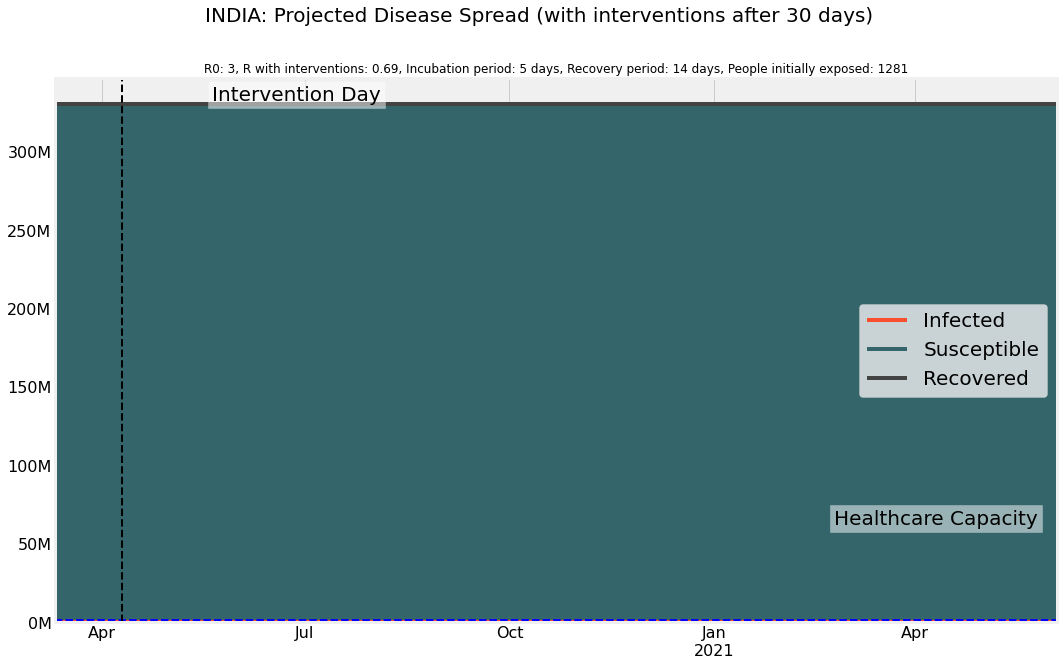

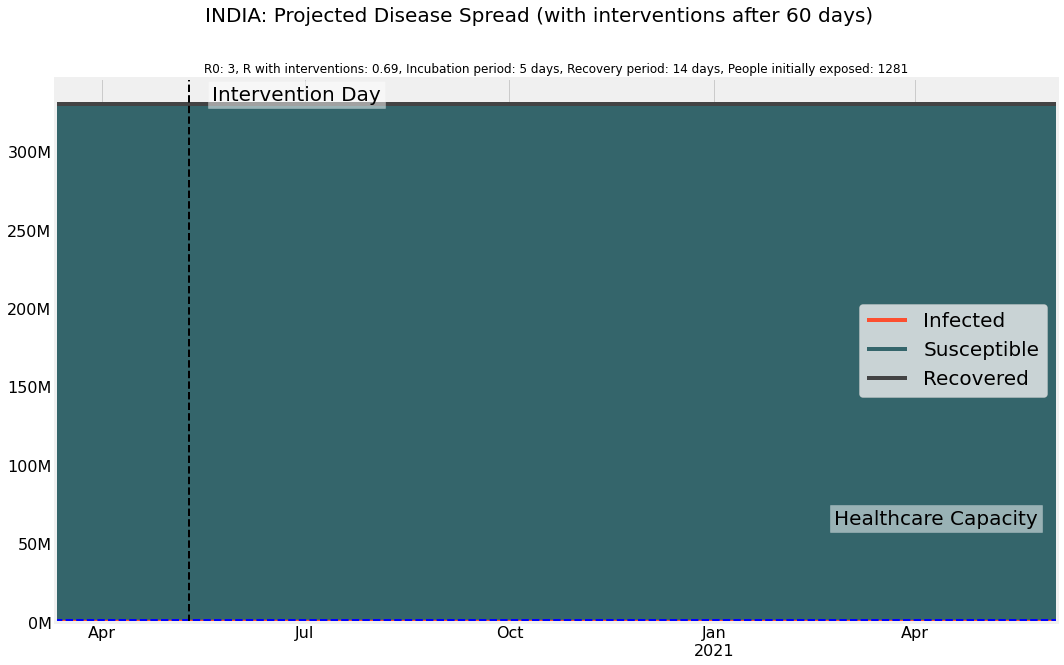

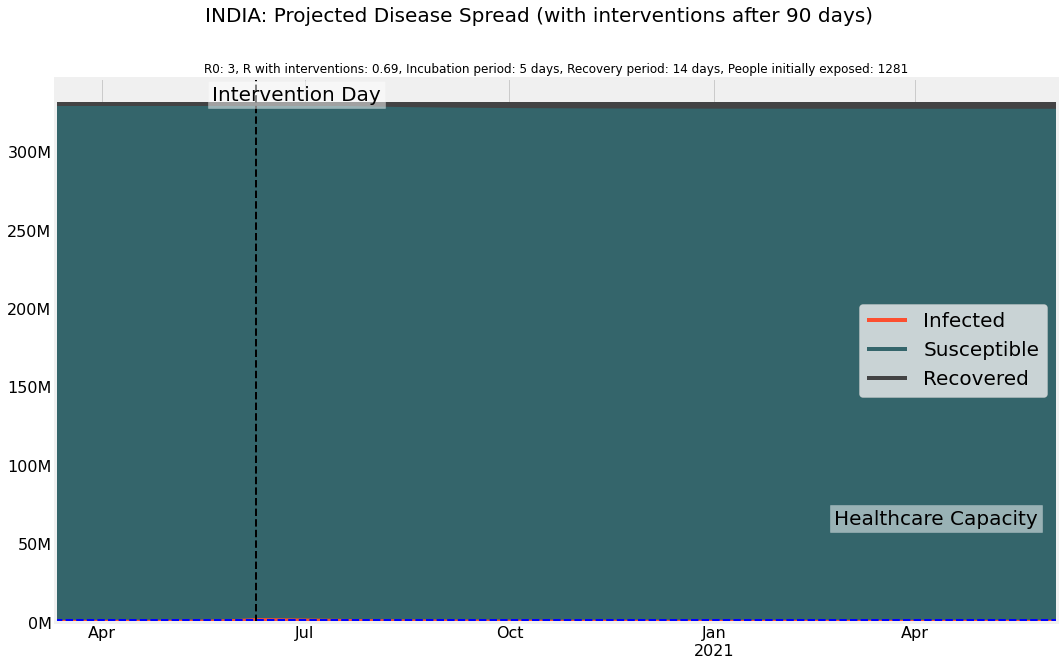

In [34]:
# Model parameters
reproduction_number_without_interventions = 3  # Number of susceptible people who get exposed/infected by an infected individual.
reproduction_number_with_interventions = 0.69  # Number of susceptible people who get exposed/infected by an infected individual.

intervention_days = [30, 60, 90]
for intervention_day in intervention_days:
    # Model rates calculations
    beta = (
        lambda i: (reproduction_number_without_interventions * gamma)
        if i < intervention_day
        else (reproduction_number_with_interventions * gamma)
    )

    # Run simulation
    results_df = SEIR_model(
        initial_conditions=init_vals,
        model_parameters=(sigma, beta, gamma),
        days=simulation_duration,
    )
    # Scale outputs by population size
    results_df *= population_size
    results_df = results_df.astype(int)
    # Set date index
    results_df.index = pd.date_range(
        start_date, start_date + pd.Timedelta(days=simulation_duration)
    )

    # Plotting
    # for plotting purposes, "infected" includes individuals who have been exposed as well
    SEIR_chart(
        pd.DataFrame(
            {
                "Infected": results_df["Infected"] + results_df["Exposed"],
                "Susceptible": results_df["Susceptible"],
                "Recovered": results_df["Recovered"],
            }
        ),
        "INDIA: Projected Disease Spread (with interventions after {} days)".format(
            intervention_day
        ),
        "R0: {}, R with interventions: {}, Incubation period: {} days, Recovery period: {} days, People initially exposed: {}".format(
            reproduction_number_without_interventions,
            reproduction_number_with_interventions,
            incubation_period,
            recovery_period,
            initial_exposed,
        ),
    )
    SEIR_chart_extra_annotations(
        pd.to_datetime(start_date + pd.Timedelta(days=intervention_day)) , 894574 )

